### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [2]:
df=pd.read_csv('tele.csv')

### Exploratory data analysis

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
# Dropping irrelevant features
df.drop('customerID',axis=1,inplace=True)

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
# Checking for null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

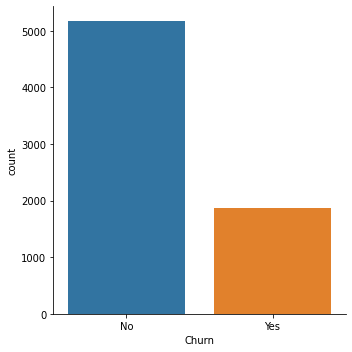

In [9]:
sns.catplot(x='Churn',data=df,kind='count')

In [10]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Separating dependant and independant features

In [11]:
X=df.drop('Churn',axis=1).values
y=df.Churn.values

### Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])
X[:,2]=le.fit_transform(X[:,2])
X[:,3]=le.fit_transform(X[:,3])
X[:,5]=le.fit_transform(X[:,5])
X[:,6]=le.fit_transform(X[:,6])
X[:,7]=le.fit_transform(X[:,7])
X[:,8]=le.fit_transform(X[:,8])
X[:,9]=le.fit_transform(X[:,9])
X[:,10]=le.fit_transform(X[:,10])
X[:,11]=le.fit_transform(X[:,11])
X[:,12]=le.fit_transform(X[:,12])
X[:,13]=le.fit_transform(X[:,13])
X[:,14]=le.fit_transform(X[:,14])
X[:,15]=le.fit_transform(X[:,15])
X[:,16]=le.fit_transform(X[:,16])
X[:,18]=le.fit_transform(X[:,18])
y=le.fit_transform(y)

In [13]:
X[1]

array([1, 0, 0, 0, 34, 1, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 3, 56.95, 1466],
      dtype=object)

In [14]:
y[1]

0

### Train-test split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Feature scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Fitting logistic regression algorithm

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_hat))
print("training accuracy:",lr.score(X_train,y_train))
print("testing accuracy:0",lr.score(X_test,y_test))


Accuracy score: 0.8168914123491838
training accuracy: 0.8044018459353922
testing accuracy:0 0.8168914123491838


### Fitting random forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_hat1=rc.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_hat1))
print("training accuracy:",rc.score(X_train,y_train))
print("testing accuracy:0",rc.score(X_test,y_test))


Accuracy score: 0.7856635911994322
training accuracy: 0.9984025559105432
testing accuracy:0 0.7856635911994322


### Fitting support vector classifier

In [19]:
from sklearn.svm import SVC
sc=SVC()
sc.fit(X_train,y_train)
y_hat2=sc.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_hat2))
print("training accuracy:",sc.score(X_train,y_train))
print("testing accuracy:0",sc.score(X_test,y_test))


Accuracy score: 0.8062455642299503
training accuracy: 0.8214412495562655
testing accuracy:0 0.8062455642299503


### Fitting decision tree classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
y_hat3=dc.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,y_hat3))
print("training accuracy:",dc.score(X_train,y_train))
print("testing accuracy:0",dc.score(X_test,y_test))


Accuracy score: 0.7004968062455642
training accuracy: 0.9985800496982605
testing accuracy:0 0.7004968062455642


#### We are going to use Logistic Regression as it gives good accuracy